## Diabetes dataset 
### Predict if a person is at risk of developing diabetes
### Binary Classification problem - XGBoost

In [160]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost==1.2

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [161]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [162]:
column_list_file = 'diabetes_train_column_list.txt'
train_file = 'diabetes_train.csv'
validation_file = 'diabetes_validation.csv'

In [163]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [164]:
columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [165]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [166]:
df_train.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,6.0,92.0,62.0,32.000000,126.000000,32.0,0.085,46
1,0,5.0,132.0,80.0,20.536458,79.799479,26.8,0.186,69
2,0,3.0,106.0,72.0,20.536458,79.799479,25.8,0.207,27
3,0,4.0,99.0,68.0,38.000000,79.799479,32.8,0.145,33
4,0,4.0,96.0,56.0,17.000000,49.000000,20.8,0.340,26


In [167]:
df_validation.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1.000000,130.0,70.0,13.000000,105.000000,25.9,0.472,22
1,1,8.000000,133.0,72.0,20.536458,79.799479,32.9,0.270,39
2,0,3.845052,137.0,68.0,14.000000,148.000000,24.8,0.143,21
3,0,2.000000,88.0,74.0,19.000000,53.000000,29.0,0.229,22
4,1,9.000000,130.0,70.0,20.536458,79.799479,34.2,0.652,45


In [168]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [169]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://xgboost.readthedocs.io/en/latest/parameter.html
classifier = xgb.XGBClassifier (objective="binary:logistic")

In [170]:
classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [171]:
classifier.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'],
               early_stopping_rounds=10)

[0]	validation_0-logloss:0.55590	validation_1-logloss:0.60171
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.47041	validation_1-logloss:0.57325
[2]	validation_0-logloss:0.41225	validation_1-logloss:0.54946
[3]	validation_0-logloss:0.36891	validation_1-logloss:0.53547
[4]	validation_0-logloss:0.33347	validation_1-logloss:0.53763
[5]	validation_0-logloss:0.30789	validation_1-logloss:0.53067
[6]	validation_0-logloss:0.28770	validation_1-logloss:0.53027
[7]	validation_0-logloss:0.26941	validation_1-logloss:0.53086
[8]	validation_0-logloss:0.25643	validation_1-logloss:0.53621
[9]	validation_0-logloss:0.24328	validation_1-logloss:0.53980
[10]	validation_0-logloss:0.22468	validation_1-logloss:0.54322
[11]	validation_0-logloss:0.21439	validation_1-logloss:0.55107
[12]	validation_0-logloss:0.20737	validation_1-logloss:0.56377
[13]	validation_0-logloss:

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
eval_result = classifier.evals_result()

In [173]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [174]:
print(training_rounds)

range(0, 16)


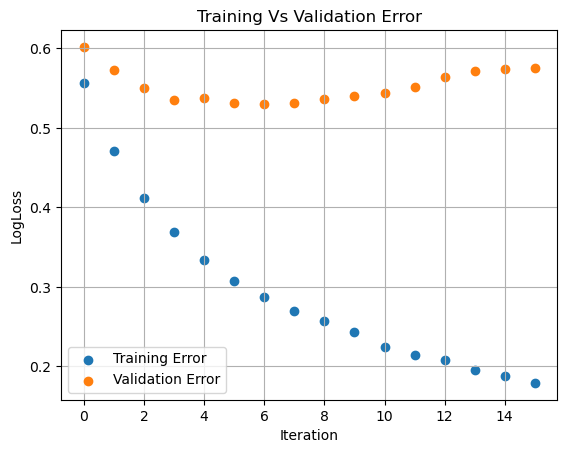

In [175]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

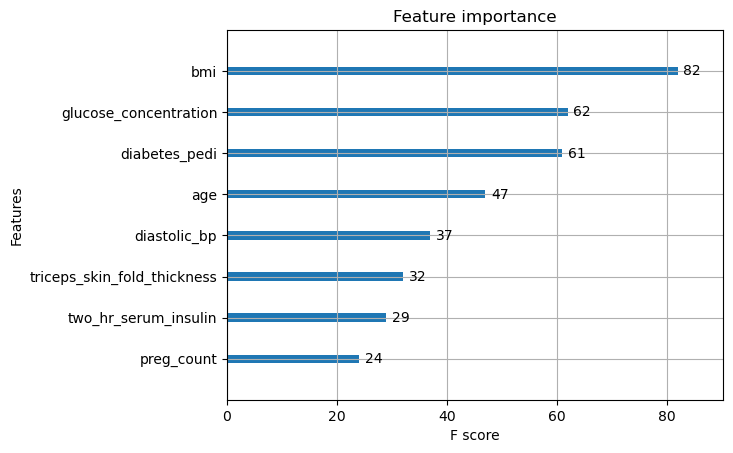

In [176]:
xgb.plot_importance(classifier)
plt.show()

In [177]:
df = pd.read_csv(validation_file,names=columns)

In [178]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1.000000,130.0,70.0,13.000000,105.000000,25.9,0.472,22
1,1,8.000000,133.0,72.0,20.536458,79.799479,32.9,0.270,39
2,0,3.845052,137.0,68.0,14.000000,148.000000,24.8,0.143,21
3,0,2.000000,88.0,74.0,19.000000,53.000000,29.0,0.229,22
4,1,9.000000,130.0,70.0,20.536458,79.799479,34.2,0.652,45


In [179]:
X_test = df.iloc[:,1:]

In [180]:
result = classifier.predict(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [181]:
result[:5]

array([0, 0, 0, 0, 1])

In [182]:
df['predicted_class'] = result

In [183]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,predicted_class
0,0,1.000000,130.0,70.0,13.000000,105.000000,25.9,0.472,22,0
1,1,8.000000,133.0,72.0,20.536458,79.799479,32.9,0.270,39,0
2,0,3.845052,137.0,68.0,14.000000,148.000000,24.8,0.143,21,0
3,0,2.000000,88.0,74.0,19.000000,53.000000,29.0,0.229,22,0
4,1,9.000000,130.0,70.0,20.536458,79.799479,34.2,0.652,45,1


## Binary Classifier Metrics

In [184]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [185]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [186]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [187]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['diabetes_class'], df['predicted_class'],labels=[1,0])

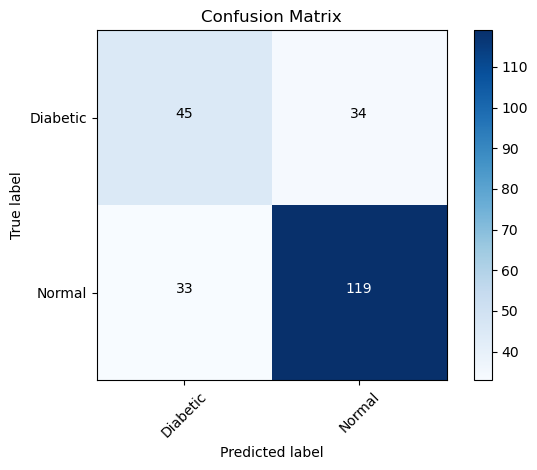

In [188]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                      title='Confusion Matrix')

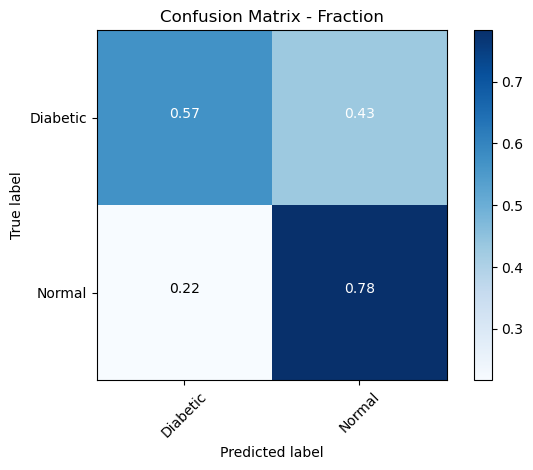

In [189]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                      title='Confusion Matrix - Fraction', normalize=True)

In [190]:
metrics = [binary_classifier_metrics(df['diabetes_class'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [191]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model,45,119,33,34,79,152,0.56962,0.782895,0.576923,0.709957,0.217105,0.43038,0.573248


In [192]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model            45             34             33           119

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model    0.57               0.43               0.22              0.78

       Precision  Accuracy    F1
Model       0.58      0.71  0.57


In [193]:
print(classification_report(
    df['diabetes_class'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Diabetic','Normal']))

              precision    recall  f1-score   support

    Diabetic       0.58      0.57      0.57        79
      Normal       0.78      0.78      0.78       152

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

